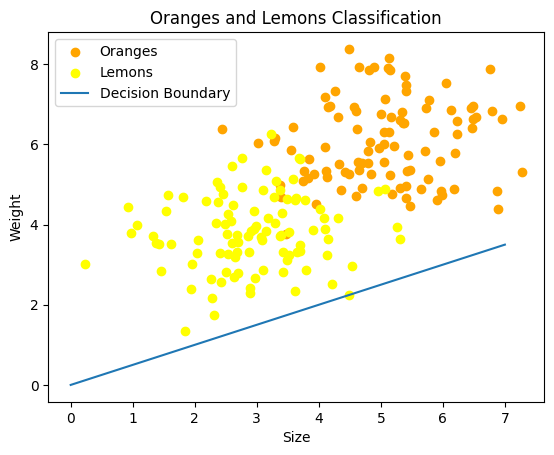

Perceptron Weights: [-0.5, 1]


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data for oranges and lemons
np.random.seed(0)  # for reproducibility
num_samples = 100
orange_size = np.random.normal(loc=5, scale=1, size=num_samples)
orange_weight = np.random.normal(loc=6, scale=1, size=num_samples)
lemon_size = np.random.normal(loc=3, scale=1, size=num_samples)
lemon_weight = np.random.normal(loc=4, scale=1, size=num_samples)

# Combine features into a single dataset
orange_data = np.column_stack((orange_size, orange_weight))
lemon_data = np.column_stack((lemon_size, lemon_weight))

# Combine labels for oranges and lemons
orange_labels = np.ones(num_samples)  # label 1 for oranges
lemon_labels = np.zeros(num_samples)   # label 0 for lemons

# Combine data and labels into a single dataset
train_data = np.vstack((orange_data, lemon_data))
train_labels = np.concatenate((orange_labels, lemon_labels))

# Define the Perceptron weights (replace with your model weights)
class Perceptron:
    def __init__(self, weights):
        self.weights = weights

p = Perceptron(weights=[-0.5, 1])

# Plot the data points and decision boundary
X = np.linspace(0, 7, 100)
fig, ax = plt.subplots()
ax.scatter(orange_data[:, 0], orange_data[:, 1], c="orange", label="Oranges")
ax.scatter(lemon_data[:, 0], lemon_data[:, 1], c="yellow", label="Lemons")

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="Decision Boundary")

ax.legend()
plt.xlabel("Size")
plt.ylabel("Weight")
plt.title("Oranges and Lemons Classification")
plt.show()

print("Perceptron Weights:", p.weights)


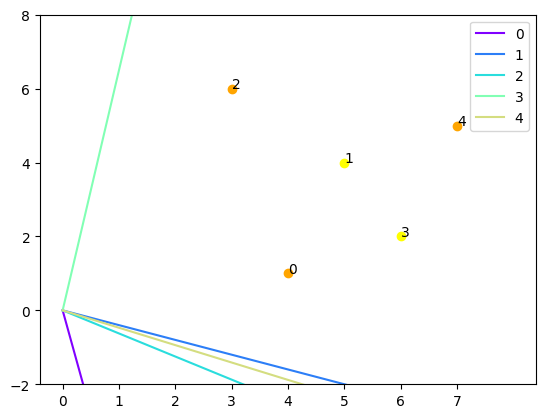

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define Perceptron class
class Perceptron:
    def __init__(self, weights, learning_rate):
        self.weights = weights
        self.learning_rate = learning_rate

    def adjust(self, target, output, inputs):
        error = target - output
        for i in range(len(self.weights)):
            self.weights[i] += self.learning_rate * error * inputs[i]

    def predict(self, inputs):
        activation = np.dot(inputs, self.weights)
        return 1 if activation >= 0 else 0

# Sample data for demonstration
train_data = np.array([[2, 3], [4, 1], [5, 4], [3, 6], [6, 2], [7, 5]])
train_labels = np.array([1, 0, 1, 0, 1, 0])  # Binary labels

# Initialize Perceptron
p = Perceptron(weights=[0.1, 0.1], learning_rate=0.3)

# Plotting settings
number_of_colors = 7
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))
X = np.linspace(0, 8, 100)  # X values for plotting

# Plotting the data points and decision boundaries during training
fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])
counter = 0

for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index], p.predict(train_data[index]), train_data[index])
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] == 0 else "yellow"
        ax.scatter(train_data[index][0], train_data[index][1], color=color)
        ax.annotate(str(counter), (train_data[index][0], train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        ax.plot(X, m * X, label=str(counter), color=colors[counter])
        counter += 1

ax.legend()
plt.show()

